---
<h1 align="center"><strong>Movie Review Classification</strong></h1>
<h4 align="center">TF-IDF & Logistic Regression</h4>

---

### Required Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import time
import re
import pickle
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Data Preparation

In [2]:
!gdown --id 1qaw9jL-KpuSsjeP3K_2hc2mkrn9bdGJN -q
!unzip "IMDB Dataset.csv.zip" -d data

Archive:  IMDB Dataset.csv.zip
  inflating: data/IMDB Dataset.csv   


In [3]:
df = pd.read_csv("data/IMDB Dataset.csv")
df = df[:1000]

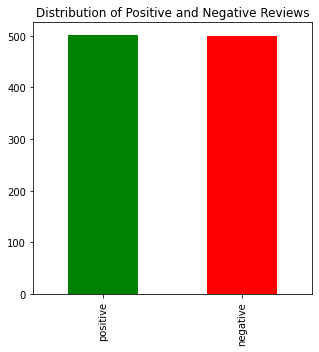

In [4]:
# Display distribution of Postive and Negative reviews.
df["sentiment"].value_counts().plot(kind='bar',
                                    color=['green','red'],
                                    title='Distribution of Positive and Negative Reviews',
                                    figsize=(5,5));

In [5]:
def decontracted(x):
  x = str(x).lower()
  x = x.replace(",000,000", " m").replace(",000", " k").replace("′", "'").replace("’", "'")\
  .replace("won't", " will not").replace("cannot", " can not").replace("can't", " can not")\
  .replace("n't", " not").replace("what's", " what is").replace("it's", " it is")\
  .replace("'ve", " have").replace("'m", " am").replace("'re", " are")\
  .replace("he's", " he is").replace("she's", " she is").replace("'s", " own")\
  .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
  .replace("€", " euro ").replace("'ll", " will").replace("how's"," how has").replace("y'all"," you all")\
  .replace("o'clock"," of the clock").replace("ne'er"," never").replace("let's"," let us")\
  .replace("finna"," fixing to").replace("gonna"," going to").replace("gimme"," give me").replace("gotta"," got to").replace("'d"," would")\
  .replace("daresn't"," dare not").replace("dasn't"," dare not").replace("e'er"," ever").replace("everyone's"," everyone is")\
  .replace("'cause'"," because")
    
  x = re.sub(r"([0-9]+)000000", r"\1m", x)
  x = re.sub(r"([0-9]+)000", r"\1k", x)
  return x

In [6]:
def remove_html(sentence): 
  pattern = re.compile('<.*?>')
  cleaned_sentence = re.sub(pattern,' ',sentence)
  return cleaned_sentence

def remove_url(sentence):
  text = re.sub(r"http\S+", " ", sentence)
  cleaned_sentence = re.sub(r"www.\S+", " ", text)
  return cleaned_sentence

def remove_punctuations(sentence):
  cleaned_sentence  = re.sub('[^a-zA-Z]',' ',sentence)
  return cleaned_sentence

def remove_patterns(sentence): 
  cleaned_sentence = re.sub("\\s*\\b(?=\\w*(\\w)\\1{2,})\\w*\\b",' ',sentence)
  return cleaned_sentence

def remove_stopwords(sentence):
  default_stopwords = set(nltk.corpus.stopwords.words('english'))
  remove_not = set(['no', 'nor', 'not'])
  custom_stopwords = default_stopwords - remove_not
  review = [words.lower() for words in sentence.split() if words not in custom_stopwords]
  cleaned_sentence = " ".join(review)
  return cleaned_sentence

def stem_text(sentence):
  stemmer = PorterStemmer()
  stemmed_sentence = stemmer.stem(sentence)
  return stemmed_sentence

def lemmatize_text(sentence):
  lemmatizer = WordNetLemmatizer()
  lemmatized_sentence = lemmatizer.lemmatize(sentence)
  return lemmatized_sentence

def clean_data(sentence):
  cleaned_sentence = lemmatize_text(stem_text(remove_stopwords(remove_patterns(remove_punctuations(remove_url(remove_html(decontracted(sentence))))))))
  return cleaned_sentence

In [7]:
def preprocess_data(df):

  # Cleaning -- Stemming --Lemmetization
  df["review"] = df["review"].apply(clean_data)

  # # Stemming
  # stemmer = PorterStemmer()
  # df["review"] = df["review"].apply(stemmer.stem)

  # # Lemmetization
  # lemmatizer = WordNetLemmatizer()
  # df["review"] = df["review"].apply(lemmatizer.lemmatize)

  # Encode sentiments
  df["sentiment"].replace(["positive", "negative"], [1, 0], inplace=True)
  
  return df

In [8]:
df = preprocess_data(df)

In [9]:
vectorizer = TfidfVectorizer(min_df=2,
                             max_df=0.5,
                             ngram_range=(1,2))

x = vectorizer.fit_transform(df['review'])
y =  df['sentiment']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Model Training

In [11]:
start = time.time()

clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(x_train, y_train)

end = time.time()
duration = end - start
print ('\n This Model took %0.2f seconds (%0.1f minutes) to train'%(duration, duration/60) )


 This Model took 0.11 seconds (0.0 minutes) to train


### Model Evaluation


Performance metrics

Accuracy score :  0.86
Precision score:  0.8865979381443299
Recall score   :  0.8349514563106796
F1 score       :  0.86

Classification report 

               precision    recall  f1-score   support

           0       0.83      0.89      0.86        97
           1       0.89      0.83      0.86       103

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



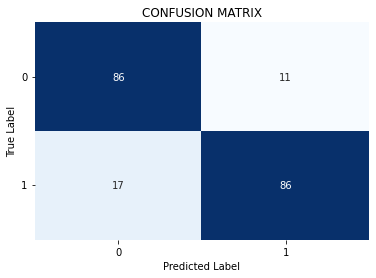

In [12]:
y_pred = clf.predict(x_test)

print("==="*50)
print("\nPerformance metrics\n")
print("Accuracy score : ", metrics.accuracy_score(y_test, y_pred))
print("Precision score: ", metrics.precision_score(y_test, y_pred))
print("Recall score   : ", metrics.recall_score(y_test, y_pred))
print("F1 score       : ", metrics.f1_score(y_test, y_pred))

print("==="*50)
print("\nClassification report \n\n", metrics.classification_report(y_test, y_pred))

print("==="*50)
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Predicted Label", 
       ylabel="True Label", 
       xticklabels=np.unique(y_test), 
       yticklabels=np.unique(y_test), 
       title="CONFUSION MATRIX")
plt.yticks(rotation=0);

### Inference

In [13]:
file = open('tfidfVectorizer.pickle','wb')
pickle.dump(vectorizer, file)
file.close()

file = open('lrModel.pickle','wb')
pickle.dump(clf, file)
file.close()

In [14]:
# predictions = clf.predict(x_test)
# output = pd.DataFrame({'review': x_test, 'sentiment': predictions})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")

In [15]:
def get_review_sentiment(review, vectorizer, model):
  review = clean_data(review)
  review = vectorizer.transform([review])
  sentiment = model.predict(review)
  probability = model.predict_proba(review)

  return {
      "Sentiment" : "Positive" if sentiment==1 else "Negative",
      "Positive prediction" : probability[0][1],
      "Negative prediction" : probability[0][0]
      }

In [16]:
# Load saved models
vectorizer = pickle.load(open("tfidfVectorizer.pickle", "rb"))
model = pickle.load(open("lrModel.pickle", "rb"))

# Movie review
review = "this is a fucking bad movie"

print(get_review_sentiment(review, vectorizer, model))

{'Sentiment': 'Negative', 'Positive prediction': 0.3303717624732253, 'Negative prediction': 0.6696282375267747}


In [17]:
review = "very good and wonderful movie"

print(get_review_sentiment(review, vectorizer, model))

{'Sentiment': 'Positive', 'Positive prediction': 0.6481414958873507, 'Negative prediction': 0.3518585041126493}
